# Eoghan McGlinchey - 18300093

In [1]:
#import relevant packages
import json
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#change the size of the visualisation to make it big and more readable
plt.rcParams['figure.figsize'] = (20, 10)

## Task 1

In [3]:
#function to create lists (list of movie ids) for each key (actor), 
#taking an index key i and a list l as arguments
def populate_list(i, l):
    #empty list
    new_l = []
    #iterate over all the movies for this actor (i)
    for j in range(len(l['movies'][i])):
        #append the id of the movie to the list (in case movies with the same titles with different years exist)
        new_l.append(l['movies'][i][j]['id'])
    #return the list
    return new_l

In [4]:
#function that will create a weighted graph, taking a json 
#file and a graph object graph as arguments
def create_graph_from_json(json, graph):
    #read the data as a JSON file
    data = pd.read_json(json)
    
    #create a dictionary where the keys are actors and the values are
    #returned by the populate_list() function

    #start by creating an empty dictionary
    dicts = {}
    keys = data['name']
    #assign 0 to variable x to keep track of the names
    x=0
    for i in keys:
        #key i is assigned the value of the list of this actor's movie ids
        dicts[i] = populate_list(x, data)
        x+=1
        
    #make a list of the keys from the dicts dictionary
    keys_list = list(dicts)
    #iterate over the actors from first to penultimate
    for i in range(len(data['name'])-1):
        #iterate over the actors from the i+1th to the last
        for j in range(i+1, len(data['name'])):
            #create a list called common, which stores the movie ids in which the 
            #ith and jth actors starred
            common = list(set(dicts[keys_list[i]]).intersection(dicts[keys_list[j]]))
            """if the actors co-star in at least one movie, then we
            can add this edge and the weight which is the number
            of movies in which they co-starred, this answers part b
            of the task"""
            if(len(common) > 0):
                graph.add_edge(data['name'][i], data['name'][j], weight=len(common))

## dataset1

In [5]:
#create a graph object called graph1 and create
#a weighted graph for dataset1
graph1 = nx.Graph()
create_graph_from_json('18300093-dataset1.json', graph1)

In [6]:
#list the edges of the graph
for i in graph1.edges(data=True):
    print(i)

('Vera Farmiga', 'William Hurt', {'weight': 1})
('Vera Farmiga', 'Angela Bassett', {'weight': 1})
('Vera Farmiga', 'Leonardo DiCaprio', {'weight': 1})
('Vera Farmiga', 'Franka Potente', {'weight': 1})
('Vera Farmiga', 'Anna Kendrick', {'weight': 1})
('Vera Farmiga', 'Jack Nicholson', {'weight': 1})
('Vera Farmiga', 'Adrien Brody', {'weight': 1})
('Vera Farmiga', 'Winona Ryder', {'weight': 1})
('Vera Farmiga', 'Rosario Dawson', {'weight': 1})
('Vera Farmiga', 'Sam Neill', {'weight': 1})
('Vera Farmiga', 'Ian McKellen', {'weight': 1})
('William Hurt', 'Saoirse Ronan', {'weight': 1})
('William Hurt', 'Mark Ruffalo', {'weight': 2})
('William Hurt', 'Scarlett Johansson', {'weight': 3})
('William Hurt', 'Anthony Hopkins', {'weight': 1})
('William Hurt', 'Anamaria Marinca', {'weight': 1})
('William Hurt', 'Colin Farrell', {'weight': 1})
('William Hurt', 'Angela Bassett', {'weight': 1})
('William Hurt', 'Jena Malone', {'weight': 1})
('William Hurt', 'Chris Rock', {'weight': 1})
('William Hurt'

In [7]:
#before the graph is drawn, we can get the number of nodes and edges it will have
graph1.number_of_nodes(), graph1.number_of_edges()

(141, 1235)

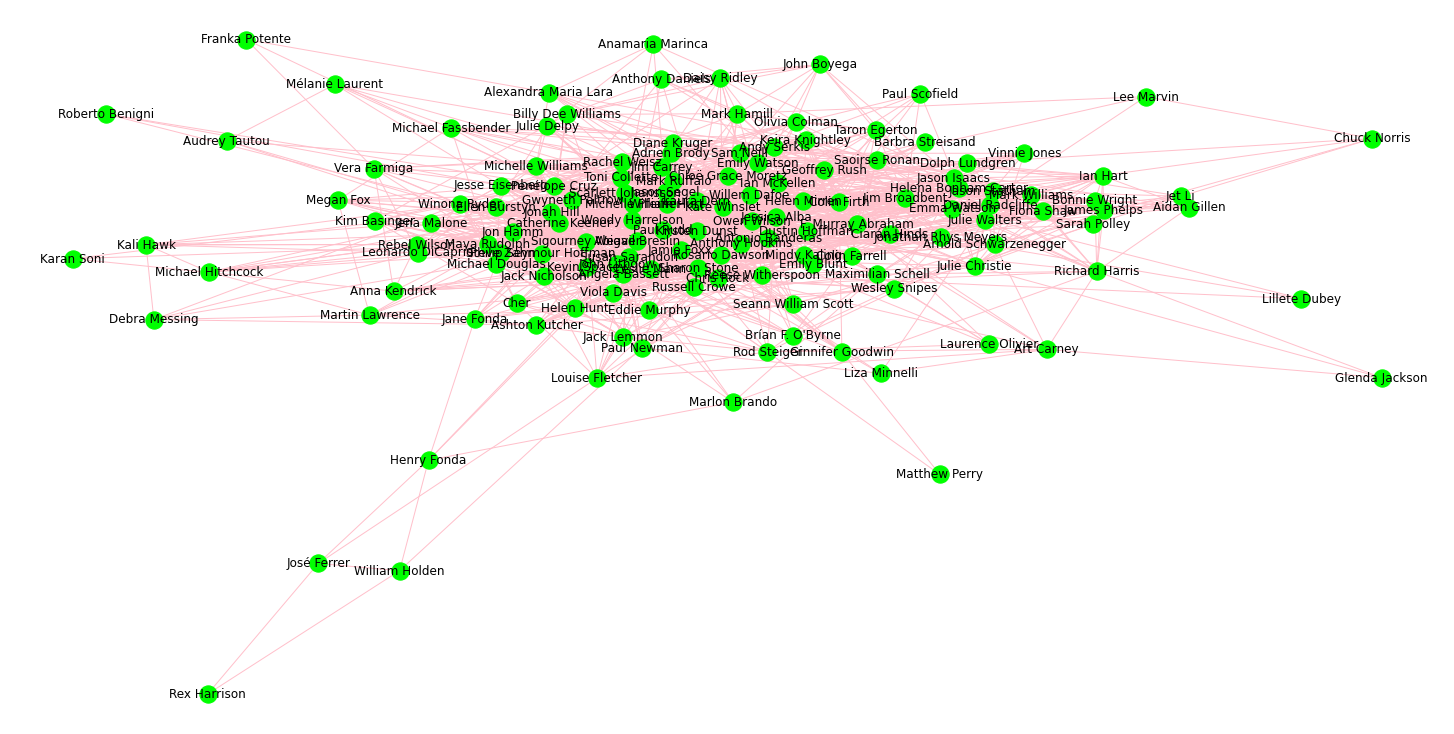

In [8]:
#draw the graph
nx.draw_spring(graph1, with_labels=True, node_color="lime", edge_color='pink')
plt.show()

I decided to represent the network with an undirected graph, undirected because naturally, the relationship between two actors in a movie is mutual. I decided to represent the network with a graph because, visually, it quickly depicts which actors co-star with each other better than other representations such as an edge list or an adjacency matrix, particularly since there are 141 nodes.

As we can see, this graph isn't very nice to look at. Afterall, it has 141 nodes and 1235 edges, meaning that the average node has almost 9 edges. We can also see that the vast majority of the edges are clustered in the middle. I tried making the widths of the edges proportional to their weight but this just made the graph look even more untidy.

## dataset2

In [9]:
#create a graph object called graph2 and create
#a weighted graph for dataset2
graph2 = nx.Graph()
create_graph_from_json('18300093-dataset2.json', graph2)

In [10]:
#list the edges of the graph
for i in graph2.edges(data=True):
    print(i)

('Kate McKinnon', 'Kristen Wiig', {'weight': 3})
('Kate McKinnon', 'Sean Penn', {'weight': 1})
('Kate McKinnon', 'Zach Galifianakis', {'weight': 1})
('Kate McKinnon', 'Diane Keaton', {'weight': 1})
('Kate McKinnon', 'Tina Fey', {'weight': 1})
('Kate McKinnon', 'Charlize Theron', {'weight': 1})
('Kate McKinnon', 'Liam Neeson', {'weight': 1})
('Kate McKinnon', 'Melissa McCarthy', {'weight': 1})
('Kate McKinnon', 'Tom Yi', {'weight': 1})
('Kate McKinnon', 'Elizabeth Berrington', {'weight': 1})
('Kate McKinnon', 'Will Ferrell', {'weight': 1})
('Kate McKinnon', 'Jennifer Aniston', {'weight': 1})
('Kate McKinnon', 'Demi Moore', {'weight': 1})
('Kristen Wiig', 'Amy Adams', {'weight': 1})
('Kristen Wiig', 'Steve Carell', {'weight': 5})
('Kristen Wiig', 'Matt Lucas', {'weight': 1})
('Kristen Wiig', 'Terry Crews', {'weight': 1})
('Kristen Wiig', 'Matt Damon', {'weight': 2})
('Kristen Wiig', 'Sean Penn', {'weight': 1})
('Kristen Wiig', 'Natalie Portman', {'weight': 1})
('Kristen Wiig', 'Elaine Ka

('Jack Black', 'Jon Voight', {'weight': 2})
('Jack Black', 'Matthew McConaughey', {'weight': 2})
('Jack Black', 'Frances McDormand', {'weight': 1})
('Clint Eastwood', 'Hilary Swank', {'weight': 1})
('Clint Eastwood', 'Gene Hackman', {'weight': 2})
('Julia Roberts', 'James Gandolfini', {'weight': 1})
('Julia Roberts', "Lupita Nyong'o", {'weight': 1})
('Julia Roberts', 'Marlee Matlin', {'weight': 1})
('Julia Roberts', 'Stephen Rea', {'weight': 2})
('Julia Roberts', 'Goldie Hawn', {'weight': 1})
('Julia Roberts', 'Denzel Washington', {'weight': 1})
('Julia Roberts', 'Whoopi Goldberg', {'weight': 2})
('Julia Roberts', 'Cleo King', {'weight': 1})
('Julia Roberts', 'Bruce Willis', {'weight': 3})
('Julia Roberts', 'Cameron Diaz', {'weight': 1})
('Julia Roberts', 'Harrison Ford', {'weight': 1})
('Julia Roberts', 'Carrie-Anne Moss', {'weight': 1})
('Julia Roberts', 'Julia Stiles', {'weight': 1})
('Julia Roberts', 'Nicolas Cage', {'weight': 1})
('Julia Roberts', 'Gene Hackman', {'weight': 1})
('

In [11]:
#before the graph is drawn, we can get the number of nodes and edges it will have
graph2.number_of_nodes(), graph2.number_of_edges()

(157, 1543)

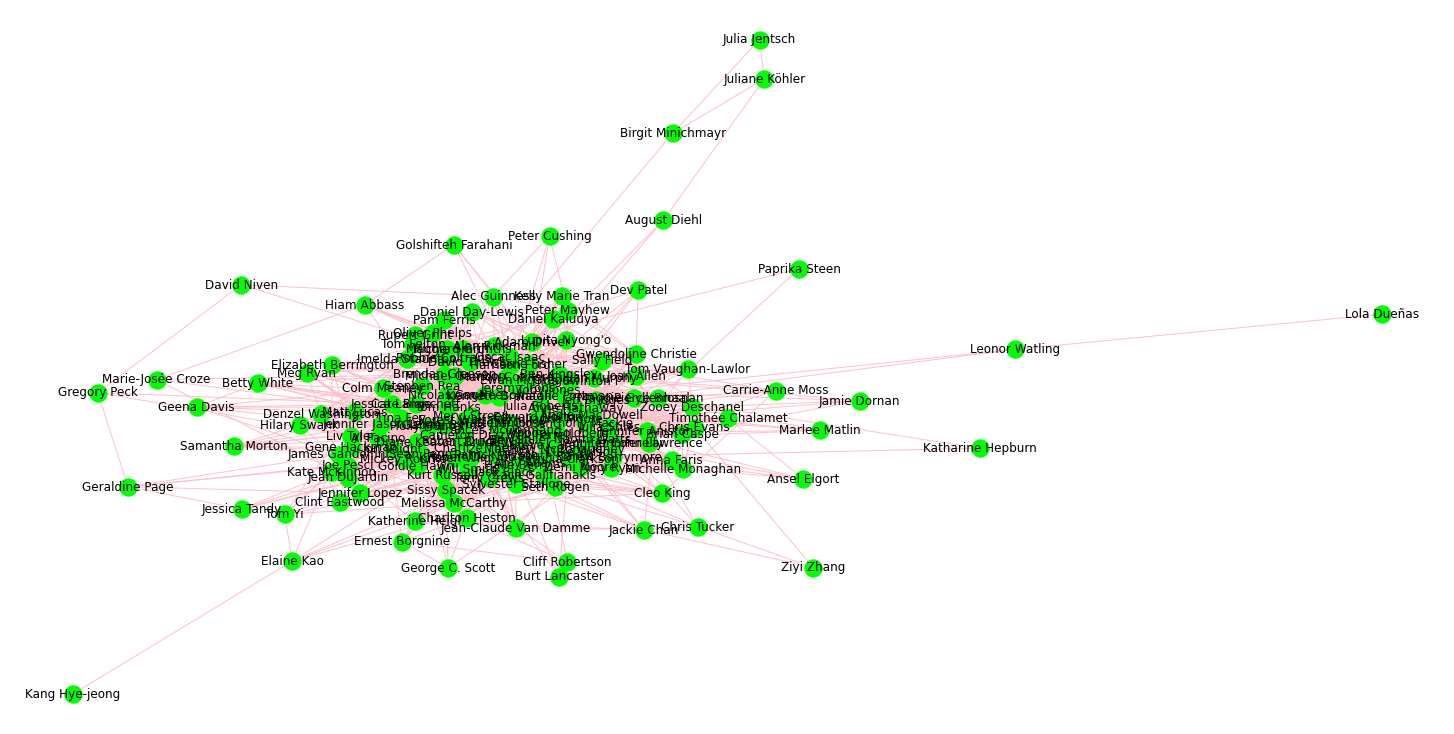

In [12]:
#draw the graph
nx.draw_spring(graph2, with_labels=True, node_color="lime", edge_color='pink')
plt.show()

I decided to represent the network with an undirected graph, undirected because naturally, the relationship between two actors in a movie is mutual. I decided to represent the network with a graph because, visually, it quickly depicts which actors co-star with each other better than other representations such as an edge list or an adjacency matrix, particularly since there are 157 nodes.

As we can see, this graph isn't very nice to look at. Afterall, it has 157 nodes and 1543 edges, meaning that the average node has almost 10 edges. We can also see that the vast majority of the edges are clustered in the middle. I tried making the widths of the edges proportional to their weight but this just made the graph look even more untidy.

# Task 2

## a)

In [13]:
#function to create a histogram of edge weight distribution
def hist_edge_weight_distribution(graph):
    
    #create a dictionary from all the edge weights
    weights = {}
    for node1, node2, data in graph.edges(data=True):
        weights[(node1, node2)] = data['weight']
    
    #convert the dictionary to a Pandas Series for convenience
    s_weights = pd.Series(weights)
    
    #plot a histogram of edge weight distribution
    ax = s_weights.plot.hist(figsize=(11,6), fontsize=14, legend=None, color="lime")
    ax.set_ylabel("Number of Edges", fontsize=14)
    ax.set_xlabel("Weight", fontsize=14)

In [14]:
#function to print the top n pairs of characters with the strongest associations
def weights_descending(graph, n):
    #create a dictionary from all the edge weights
    weights={}
    for node1, node2, data in graph.edges(data=True):
        weights[(node1, node2)] = data['weight']
    
    #convert the dictionary to a Pandas Series for convenience
    s_weights = pd.Series(weights)
    
    #identify the top n pairs of characters with the strongest associations, by ranking the weights in the series
    print(s_weights.sort_values(ascending=False).head(n))

## network1

In [15]:
graph1.is_directed()

False

We know that graph1 is not directed since relationships between actors and the movies in which they co-star are mutual.

In [16]:
list(graph1.nodes())

['Vera Farmiga',
 'William Hurt',
 'Angela Bassett',
 'Leonardo DiCaprio',
 'Franka Potente',
 'Anna Kendrick',
 'Jack Nicholson',
 'Adrien Brody',
 'Winona Ryder',
 'Rosario Dawson',
 'Sam Neill',
 'Ian McKellen',
 'Jonathan Rhys Meyers',
 'Antonio Banderas',
 'Mark Ruffalo',
 'Jim Broadbent',
 'Scarlett Johansson',
 'Anthony Hopkins',
 'Colin Farrell',
 'Philip Seymour Hoffman',
 'Maximilian Schell',
 'Ian Hart',
 'Keira Knightley',
 'Toni Collette',
 'Lillete Dubey',
 'Michelle Williams',
 'Mark Williams',
 'Fiona Shaw',
 'Reese Witherspoon',
 'Taron Egerton',
 'Jamie Foxx',
 'Julie Walters',
 'F. Murray Abraham',
 'John Boyega',
 'Olivia Colman',
 'Kevin Spacey',
 'Emily Watson',
 'Mark Hamill',
 'Colin Firth',
 'Jessica Alba',
 'Penélope Cruz',
 'Laura Dern',
 'Jason Statham',
 'Helen Mirren',
 'Barbra Streisand',
 'Ashton Kutcher',
 'Abigail Breslin',
 'Dustin Hoffman',
 'Steve Zahn',
 'Paul Rudd',
 'Kirsten Dunst',
 'Chloë Grace Moretz',
 'Kate Winslet',
 'Sharon Stone',
 'Owen 

In [17]:
nx.number_connected_components(graph1)

1

This network only has one connected component, meaning that in the whole network, a path exists between every pair of nodes

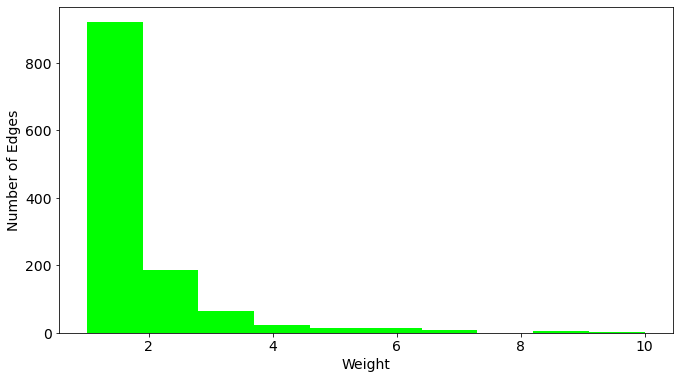

In [18]:
hist_edge_weight_distribution(graph1)

The histogram shows that the vast majority of edges have a weight of 1 and the overall trend seems as though as the weight of the edges increases, the number of edges with this weight decreases

In [19]:
weights_descending(graph1, 10)

Emma Watson       Daniel Radcliffe    10
James Phelps      Bonnie Wright        9
Emma Watson       Bonnie Wright        9
Mark Hamill       Anthony Daniels      9
Emma Watson       James Phelps         9
Daniel Radcliffe  James Phelps         9
                  Bonnie Wright        9
Mark Williams     James Phelps         7
Paul Rudd         Jason Segel          7
Julie Walters     Bonnie Wright        7
dtype: int64


Unsurprisingly, most of the edges with the highest weights are connected to actors who starred in the Harry Potter movies

In [20]:
nx.density(graph1)

0.12512664640324214

Here, we can see that this network is quite sparse, meaning that the portion of potential edges between nodes that exist as actual edges is quite low

In [73]:
nx.diameter(graph1)

5

Here, we can see that to get from one node to another, at most only 5 nodes will need to be visited on this path

## network2

In [21]:
graph2.is_directed()

False

Similarly to graph 1, we know that graph2 is not directed since relationships between actors and the movies in which they co-star are mutual.

In [22]:
list(graph2.nodes())

['Kate McKinnon',
 'Kristen Wiig',
 'Sean Penn',
 'Zach Galifianakis',
 'Diane Keaton',
 'Tina Fey',
 'Charlize Theron',
 'Liam Neeson',
 'Melissa McCarthy',
 'Tom Yi',
 'Elizabeth Berrington',
 'Will Ferrell',
 'Jennifer Aniston',
 'Demi Moore',
 'Toby Jones',
 'Naomi Watts',
 'Jessica Lange',
 'Jennifer Connelly',
 'Natalie Portman',
 'Kenneth Branagh',
 'Richard Griffiths',
 'Jeremy Irons',
 'Tom Vaughan-Lawlor',
 'Imelda Staunton',
 'Brendan Gleeson',
 'Cillian Murphy',
 'Tilda Swinton',
 'Jennifer Jason Leigh',
 'Dev Patel',
 'Chris Evans',
 'Patricia Clarkson',
 'Robert De Niro',
 'Gwendoline Christie',
 'Jamie Dornan',
 'Anne Hathaway',
 'Drew Barrymore',
 'Jennifer Lawrence',
 'Tom Felton',
 'Zooey Deschanel',
 'Michael Gambon',
 'Ewan McGregor',
 'Rupert Grint',
 'Robbie Coltrane',
 'David Thewlis',
 'Alan Rickman',
 'Brian Caspe',
 'Maggie Smith',
 'Julianne Moore',
 'Edward Norton',
 'Anthony Mackie',
 'Oliver Phelps',
 'Elizabeth Banks',
 'Katharine Hepburn',
 'Pierce Brosn

In [23]:
nx.number_connected_components(graph2)

1

This network only has one connected component, meaning that in the whole network, a path exists between every pair of nodes

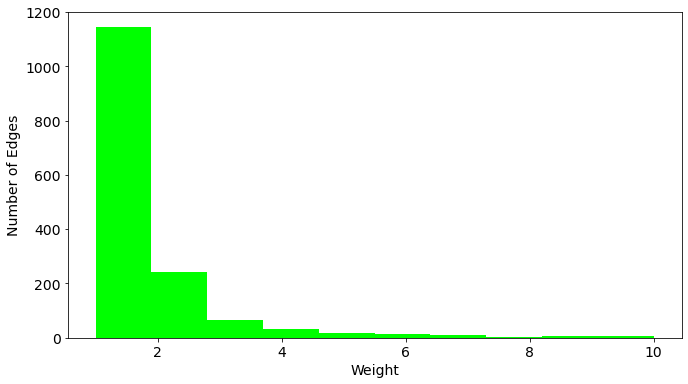

In [24]:
hist_edge_weight_distribution(graph2)

The histogram shows that the vast majority of edges have a weight of 1 and the overall trend seems as though as the weight of the edges increases, the number of edges with this weight decreases

In [25]:
weights_descending(graph2, 10)

Michael Gambon   Maggie Smith       10
Jack Black       Seth Rogen         10
Robbie Coltrane  Oliver Phelps      10
Rupert Grint     Oliver Phelps      10
                 Robbie Coltrane    10
Robbie Coltrane  Alan Rickman        9
Rupert Grint     Alan Rickman        9
Tom Felton       Oliver Phelps       9
                 Robbie Coltrane     9
                 Rupert Grint        9
dtype: int64


Similar to network1, a lot of edges connected to actors who starred in the Harry Potter movies appear here

In [26]:
nx.density(graph2)

0.12600032663726932

Here, we can see that this network is quite sparse, meaning that the portion of potential edges between nodes that exist as actual edges is quite low

In [74]:
nx.diameter(graph2)

6

Here, we can see that to get from one node to another, at most only 6 nodes will need to be visited on this path

## b)

In [27]:
#function to print the top n pairs of characters with the highest degree centrality
def degCentrality_descending(graph, n):
    #create a series of all the degree centralities of each node
    s_deg = pd.Series(nx.degree_centrality(graph))
    print(s_deg.sort_values(ascending=False).head(n))

In [28]:
#function to print the top n pairs of characters with the highest closeness centrality
def closeCentrality_descending(graph, n):
    #create a series of all the closeness centralities of each node
    s_close = pd.Series(nx.closeness_centrality(graph))
    print(s_close.sort_values(ascending=False).head(n))

In [29]:
#function to print the top n pairs of characters with the highest betweenness centrality
def betwCentrality_descending(graph, n):
    #create a series of all the betweenness centralities of each node
    s_betw = pd.Series(nx.betweenness_centrality(graph))
    print(s_betw.sort_values(ascending=False).head(n))

In [30]:
#function to print the top n pairs of characters with the highest eigenvector centrality
def eigCentrality_descending(graph, n):
    #create a series of all the eigenvector centralities of each node
    s_eig = pd.Series(nx.eigenvector_centrality(graph))
    print(s_eig.sort_values(ascending=False).head(n))

## network1

In [31]:
degCentrality_descending(graph1, 10)

Susan Sarandon     0.314286
Anthony Hopkins    0.307143
Paul Rudd          0.271429
Kate Winslet       0.257143
Helen Mirren       0.250000
Woody Harrelson    0.242857
Laura Dern         0.242857
Jim Broadbent      0.242857
William Hurt       0.242857
Mark Ruffalo       0.235714
dtype: float64


Here, we can see that the Susan Sarandon node has the most edges, meaning that she co-stars with the most actors in this network

In [32]:
closeCentrality_descending(graph1, 10)

Susan Sarandon     0.578512
Anthony Hopkins    0.573770
Paul Rudd          0.560000
Helen Mirren       0.553360
Laura Dern         0.551181
Owen Wilson        0.551181
Willem Dafoe       0.549020
Woody Harrelson    0.549020
Kate Winslet       0.546875
William Hurt       0.546875
dtype: float64


Here, we can see that Susan Sarandon has the highest closeness centrality in the network, meaning that her node is closest to all other in the network. This is probably influenced by the fact that she also has the highest degree centrality

In [33]:
betwCentrality_descending(graph1, 10)

Susan Sarandon     0.050376
Anthony Hopkins    0.036172
Penélope Cruz      0.027511
William Hurt       0.027183
Paul Rudd          0.026785
Laura Dern         0.025027
Jim Broadbent      0.024728
Kate Winslet       0.022741
Woody Harrelson    0.022137
Owen Wilson        0.021654
dtype: float64


Here, we can see that Susan Sarandon has the highest betweenness centrality in the network, meaning that her node occurs on the most shortest paths between other nodes in the network. This is probably influenced by the fact that she also has the highest closeness centrality

In [34]:
eigCentrality_descending(graph1, 10)

Anthony Hopkins    0.181531
Susan Sarandon     0.181310
Paul Rudd          0.159691
Helen Mirren       0.156697
Kate Winslet       0.156522
Kirsten Dunst      0.147557
Penélope Cruz      0.145281
Woody Harrelson    0.144092
Laura Dern         0.143519
Willem Dafoe       0.142962
dtype: float64


Here, we can see that Anthony Hopkins has the highest eigenvector centrality in the network, meaning that his node is connected to the most central nodes in the network. Interestingly, Susan Sarandon makes an appearance here as the second highest eigenvector centrality, which is not surprising since she was also ranked highest for closeness centrality, meaning she would already be surrounded by a lot of nodes

## network2

In [35]:
degCentrality_descending(graph2, 10)

Matt Damon         0.346154
Bruce Willis       0.346154
Liam Neeson        0.346154
Robert De Niro     0.307692
Julianne Moore     0.301282
Meryl Streep       0.301282
Edward Norton      0.269231
Toby Jones         0.269231
Julia Roberts      0.262821
Brendan Gleeson    0.256410
dtype: float64


Here, we can see that the Matt Damon, Bruce Willis and Liam Neeson nodes have the most edges, meaning that they co-star with the most actors in this network

In [36]:
closeCentrality_descending(graph2, 10)

Liam Neeson        0.590909
Matt Damon         0.588679
Bruce Willis       0.588679
Robert De Niro     0.565217
Meryl Streep       0.563177
Julianne Moore     0.559140
Edward Norton      0.557143
Jeremy Irons       0.555160
Brendan Gleeson    0.549296
Toby Jones         0.549296
dtype: float64


Here, we can see that Liam Neeson has the highest closeness centrality in the network, meaning that his node is closest to all other in the network. This is probably influenced by the fact that he also has the joint highest degree centrality

In [37]:
betwCentrality_descending(graph2, 10)

Alan Rickman       0.043557
Bruce Willis       0.043405
Matt Damon         0.040139
Liam Neeson        0.037623
Robert De Niro     0.036045
Natalie Portman    0.030098
Jeremy Irons       0.029381
Toby Jones         0.026586
Meryl Streep       0.023354
Brendan Gleeson    0.022151
dtype: float64


Here, we can see that Alan Rickman has the highest betweenness centrality in the network, meaning that his node occurs on the most shortest paths between other nodes in the network.

In [38]:
eigCentrality_descending(graph2, 10)

Liam Neeson       0.186185
Bruce Willis      0.180172
Matt Damon        0.180098
Julianne Moore    0.173209
Meryl Streep      0.169428
Robert De Niro    0.164178
Edward Norton     0.161790
Julia Roberts     0.149406
Jeremy Irons      0.140675
Michael Gambon    0.134915
dtype: float64


Here, we can see that Liam Neeson has the highest eigenvector centrality in the network, meaning that his node is connected to the most central nodes in the network. This is probably influenced by the fact that he is also the most central node in the network, meaning that he would already be surrounded by a lot of other nodes

## Similarities and Differences betwen network1 and network2

In [39]:
#create series for the range of centralities in network1
s_deg1 = pd.Series(nx.degree_centrality(graph1))
s_close1 = pd.Series(nx.closeness_centrality(graph1))
s_betw1 = pd.Series(nx.betweenness_centrality(graph1))
s_eig1 = pd.Series(nx.eigenvector_centrality(graph1))

In [40]:
#create series for the range of centralities in network2
s_deg2 = pd.Series(nx.degree_centrality(graph2))
s_close2 = pd.Series(nx.closeness_centrality(graph2))
s_betw2 = pd.Series(nx.betweenness_centrality(graph2))
s_eig2 = pd.Series(nx.eigenvector_centrality(graph2))

In [41]:
#function to create scatter plot with lines of best fit
def scatter_line(independent, colours, markers, labels, x_label, y_label, title, *dependents):
    #for each dependent variable
    for i in range(len(dependents)):
        #create scatter plots for each dependent variable versus the independent variable
        plt.scatter(independent, dependents[i], color = colours[i], marker = markers[i], label = labels[i])
        #create the lines of best fit using the equation of a line (y = mx + c) by finding the slope and the y-intercept using
        #the numpy.polyfit() function
        m, c = np.polyfit(independent, dependents[i], 1)
        #plot the lines of best fit
        plt.plot(independent, m*independent + c, color = colours[i])
    
    #label the x and y axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.legend()
    plt.title(title)
    plt.show()
    
    #display the correlation coefficients
    for i in range(len(dependents)):
        print(f'The correlation coefficient between the {x_label} and the {labels[i]} is {independent.corr(dependents[i])}')

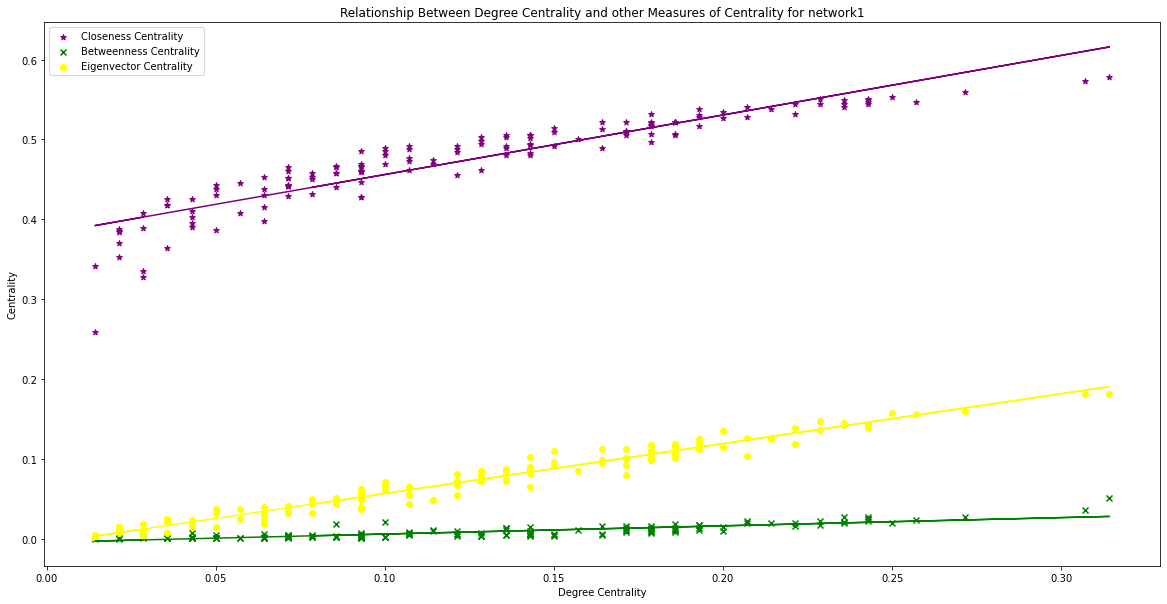

The correlation coefficient between the Degree Centrality and the Closeness Centrality is 0.917962729488357
The correlation coefficient between the Degree Centrality and the Betweenness Centrality is 0.8491170251176279
The correlation coefficient between the Degree Centrality and the Eigenvector Centrality is 0.9831941127281512


In [42]:
#create lists for colours, markers and labels
colours = ['purple', 'green', 'yellow']
markers = ['*', 'x', 'o']
labels = ['Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality']

#I would like to see the relationship between the degree centrality 
#and the other measures of centrality for network1
scatter_line(s_deg1, colours, markers, labels, 'Degree Centrality', 'Centrality', 
             'Relationship Between Degree Centrality and other Measures of Centrality for network1',
             s_close1, s_betw1, s_eig1)

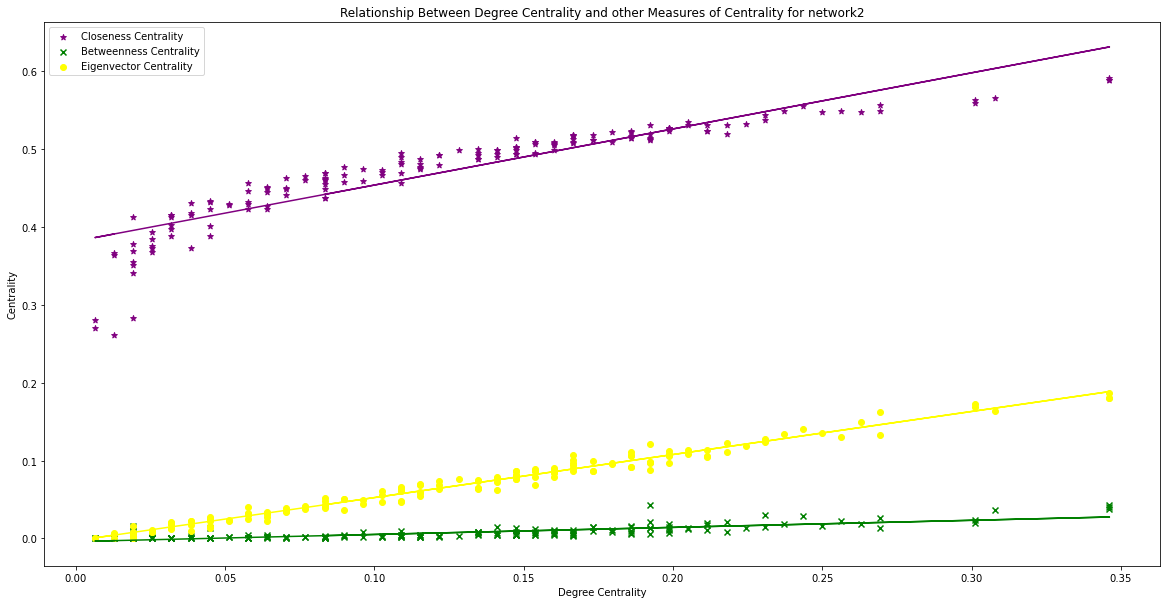

The correlation coefficient between the Degree Centrality and the Closeness Centrality is 0.9071695257356233
The correlation coefficient between the Degree Centrality and the Betweenness Centrality is 0.8033414355176182
The correlation coefficient between the Degree Centrality and the Eigenvector Centrality is 0.990075494675025


In [43]:
#create lists for colours, markers and labels
colours = ['purple', 'green', 'yellow']
markers = ['*', 'x', 'o']
labels = ['Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality']

#I would like to see the relationship between the degree centrality 
#and the other measures of centrality for network1
scatter_line(s_deg2, colours, markers, labels, 'Degree Centrality', 'Centrality', 
             'Relationship Between Degree Centrality and other Measures of Centrality for network2', 
             s_close2, s_betw2, s_eig2)

The networks seem to share more similarities than differences. For example, both network densities are almost identical with network1's density being approximately 0.125 and network2's being approximately 0.126. We also see that both networks are not connected and have one connected component each

As we can see from both scatterplots, the degree centralities in both network1 and network2 heavily influence the other measures of centrality, with all correlation coefficients being above 0.8 which indicates a very strong positive correlation, implying that as the degree centrality increases, so do the other measures of centrality for both networks. It's also worth noting that in both networks, the degree centralities have the least effect on the betweenness centralities and the most effect on the eigenvector centralities

To find a difference between the two networks, we can look at the histograms form part a) and we see that while the histograms for both networks have similar trends, it's worth noting that there are approximately 200 more edges with a weight of 1 in network2 than there are in network1. We also see from question 1 that network2 has more nodes and edges than network1. The diameter of network2 greater than network1 by one node.

# Task 3

In [44]:
#function to display ego graph, taking a graph and a node as arguments
def display_ego(graph, node):
    #create the ego network
    ego_graph = nx.ego_graph(graph, node)
    title = "Ego Network for %s (%d Nodes)" % (node, ego_graph.number_of_nodes())
    plt.title(title, fontsize=14)
    #layout all nodes using spring layout
    pos = nx.spring_layout(ego_graph)
    #draw the full network
    nx.draw(ego_graph, pos, with_labels=True, node_color='lime', edge_color='pink')
    #draw the ego node in yellow and with a larger size
    nx.draw_networkx_nodes(ego_graph, pos, nodelist=[node], node_size=1000, node_color="yellow")
    plt.show()
    #return the ego graph
    return ego_graph

## network1

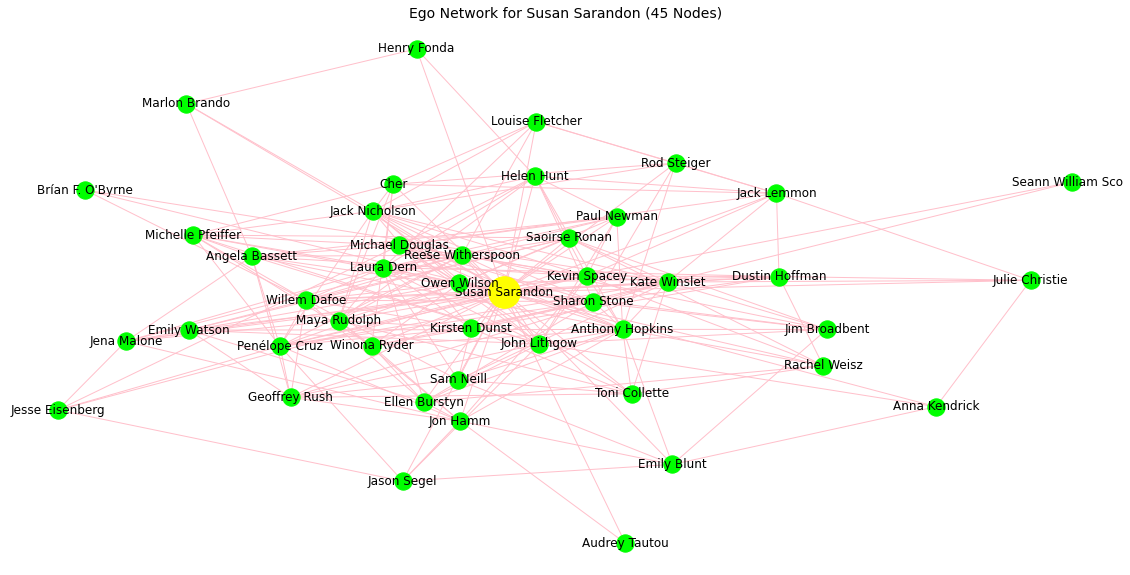

In [45]:
ego1 = display_ego(graph1, 'Susan Sarandon')

As we can see, this network with just 45 nodes is much easier to look at than the overall network in Task 1

In [46]:
ego1.number_of_nodes(), ego1.number_of_edges()

(45, 243)

In [47]:
ego1.is_directed()

False

In [48]:
list(ego1.nodes())

['Rachel Weisz',
 'Sam Neill',
 'Geoffrey Rush',
 "Brían F. O'Byrne",
 'Maya Rudolph',
 'Ellen Burstyn',
 'Cher',
 'Kevin Spacey',
 'Kirsten Dunst',
 'Dustin Hoffman',
 'Michael Douglas',
 'Jesse Eisenberg',
 'Emily Watson',
 'Helen Hunt',
 'Toni Collette',
 'Jason Segel',
 'Reese Witherspoon',
 'Jack Lemmon',
 'Audrey Tautou',
 'Anthony Hopkins',
 'Kate Winslet',
 'Henry Fonda',
 'Jon Hamm',
 'Seann William Scott',
 'Anna Kendrick',
 'Michelle Pfeiffer',
 'Penélope Cruz',
 'Louise Fletcher',
 'Paul Newman',
 'Sharon Stone',
 'Laura Dern',
 'Jim Broadbent',
 'Julie Christie',
 'Jena Malone',
 'Angela Bassett',
 'Saoirse Ronan',
 'Owen Wilson',
 'Willem Dafoe',
 'Marlon Brando',
 'Winona Ryder',
 'Emily Blunt',
 'Jack Nicholson',
 'Rod Steiger',
 'John Lithgow',
 'Susan Sarandon']

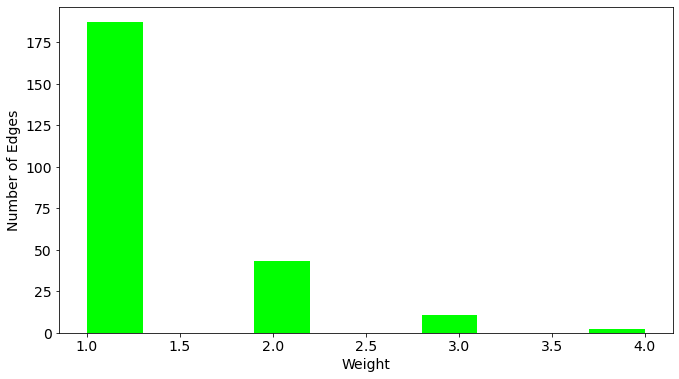

In [49]:
hist_edge_weight_distribution(ego1)

The histogram shows that the vast majority of edges have a weight of 1 and the overall trend seems as though as the weight of the edges increases, the number of edges with this weight decreases

In [50]:
weights_descending(ego1, 10)

Willem Dafoe    Susan Sarandon    4
Sam Neill       Geoffrey Rush     4
Owen Wilson     Willem Dafoe      3
Kirsten Dunst   Susan Sarandon    3
                Kate Winslet      3
Sam Neill       Toni Collette     3
Kevin Spacey    Jack Lemmon       3
Dustin Hoffman  Owen Wilson       3
Sam Neill       Willem Dafoe      3
Kirsten Dunst   Willem Dafoe      3
dtype: int64


In [51]:
nx.density(ego1)

0.24545454545454545

In [52]:
degCentrality_descending(ego1, 10)

Susan Sarandon       1.000000
Anthony Hopkins      0.454545
Kate Winslet         0.409091
Laura Dern           0.386364
Jack Nicholson       0.363636
Kevin Spacey         0.363636
Reese Witherspoon    0.363636
John Lithgow         0.363636
Willem Dafoe         0.340909
Penélope Cruz        0.340909
dtype: float64


In [53]:
closeCentrality_descending(ego1, 10)

Susan Sarandon       1.000000
Anthony Hopkins      0.647059
Kate Winslet         0.628571
Laura Dern           0.619718
Jack Nicholson       0.611111
Kevin Spacey         0.611111
Reese Witherspoon    0.611111
John Lithgow         0.611111
Willem Dafoe         0.602740
Penélope Cruz        0.602740
dtype: float64


In [54]:
betwCentrality_descending(ego1, 10)

Susan Sarandon     0.405129
Anthony Hopkins    0.039344
Kate Winslet       0.037028
Laura Dern         0.025612
John Lithgow       0.022961
Jack Nicholson     0.021077
Kevin Spacey       0.017599
Penélope Cruz      0.017394
Willem Dafoe       0.016847
Jon Hamm           0.015339
dtype: float64


In [55]:
eigCentrality_descending(ego1, 10)

Susan Sarandon       0.405422
Anthony Hopkins      0.224389
Reese Witherspoon    0.210067
Kevin Spacey         0.203559
Laura Dern           0.196211
Kate Winslet         0.195428
Jack Nicholson       0.193326
John Lithgow         0.191612
Penélope Cruz        0.186792
Willem Dafoe         0.178868
dtype: float64


Unsurprisingly, as the ego node, Susan Sarandon ranks highest in all measures of centrality

In [56]:
#create series for the range of centralities in ego network1
s_deg_ego1 = pd.Series(nx.degree_centrality(ego1))
s_close_ego1 = pd.Series(nx.closeness_centrality(ego1))
s_betw_ego1 = pd.Series(nx.betweenness_centrality(ego1))
s_eig_ego1 = pd.Series(nx.eigenvector_centrality(ego1))

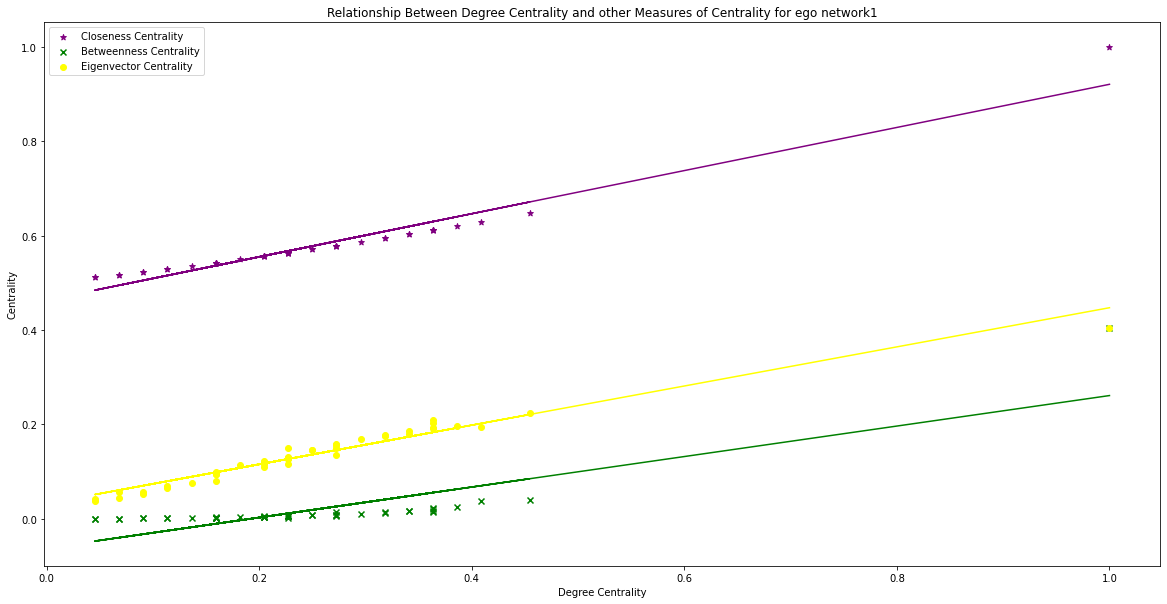

The correlation coefficient between the Degree Centrality and the Closeness Centrality is 0.9675104700519832
The correlation coefficient between the Degree Centrality and the Betweenness Centrality is 0.8300980298958913
The correlation coefficient between the Degree Centrality and the Eigenvector Centrality is 0.9807720158371858


In [57]:
#create lists for colours, markers and labels
colours = ['purple', 'green', 'yellow']
markers = ['*', 'x', 'o']
labels = ['Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality']

#I would like to see the relationship between the degree centrality 
#and the other measures of centrality for ego network1
scatter_line(s_deg_ego1, colours, markers, labels, 'Degree Centrality', 'Centrality', 
             'Relationship Between Degree Centrality and other Measures of Centrality for ego network1',
             s_close_ego1, s_betw_ego1, s_eig_ego1)

Similar to network1, the ego network's centralities are strongly influenced by its degree centrality. The degree centrality has a particularly strong influence on the eigenvector centrality with a correlation coefficient of 0.98

## network2

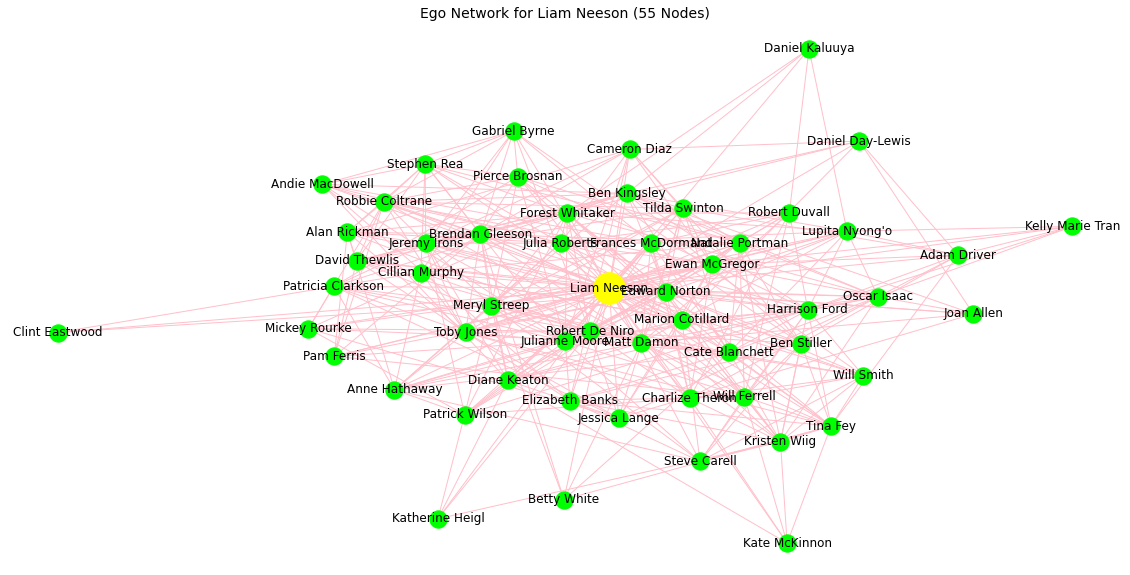

In [58]:
ego2 = display_ego(graph2, 'Liam Neeson')

As we can see, this network with just 45 nodes is much easier to look at than the overall network in Task 1

In [59]:
ego2.number_of_nodes(), ego2.number_of_edges()

(55, 409)

In [60]:
ego2.is_directed()

False

In [61]:
list(ego2.nodes())

['Matt Damon',
 'Alan Rickman',
 'Stephen Rea',
 "Lupita Nyong'o",
 'Will Ferrell',
 'Robert Duvall',
 'Meryl Streep',
 'Harrison Ford',
 'Tina Fey',
 'Cate Blanchett',
 'Charlize Theron',
 'Frances McDormand',
 'Pierce Brosnan',
 'Gabriel Byrne',
 'Liam Neeson',
 'Natalie Portman',
 'Julianne Moore',
 'Brendan Gleeson',
 'Robbie Coltrane',
 'Jeremy Irons',
 'Pam Ferris',
 'Julia Roberts',
 'Diane Keaton',
 'Edward Norton',
 'Kristen Wiig',
 'Katherine Heigl',
 'Oscar Isaac',
 'Betty White',
 'Toby Jones',
 'Patricia Clarkson',
 'Patrick Wilson',
 'Kate McKinnon',
 'Joan Allen',
 'Jessica Lange',
 'Ben Stiller',
 'Daniel Kaluuya',
 'Kelly Marie Tran',
 'Mickey Rourke',
 'Ben Kingsley',
 'David Thewlis',
 'Steve Carell',
 'Andie MacDowell',
 'Daniel Day-Lewis',
 'Cillian Murphy',
 'Robert De Niro',
 'Anne Hathaway',
 'Tilda Swinton',
 'Ewan McGregor',
 'Will Smith',
 'Adam Driver',
 'Clint Eastwood',
 'Forest Whitaker',
 'Elizabeth Banks',
 'Cameron Diaz',
 'Marion Cotillard']

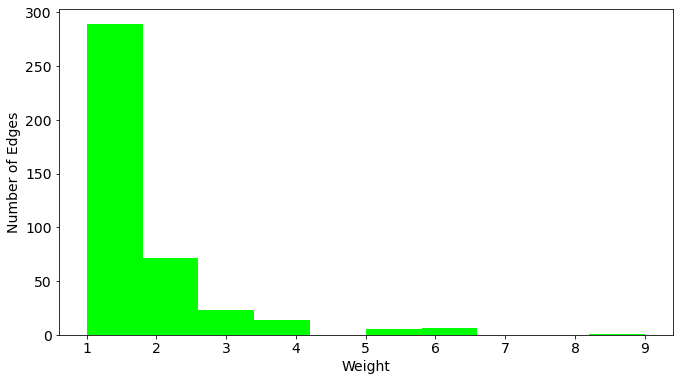

In [62]:
hist_edge_weight_distribution(ego2)

The histogram shows that the vast majority of edges have a weight of 1 and the overall trend seems as though as the weight of the edges increases, the number of edges with this weight decreases

In [63]:
weights_descending(ego2, 10)

Alan Rickman     Robbie Coltrane    9
Stephen Rea      Brendan Gleeson    6
Ben Stiller      Robert De Niro     6
Oscar Isaac      Adam Driver        6
Will Ferrell     Ben Stiller        6
                 Steve Carell       6
Brendan Gleeson  Cillian Murphy     6
Kristen Wiig     Steve Carell       5
Alan Rickman     David Thewlis      5
Robbie Coltrane  David Thewlis      5
dtype: int64


In [64]:
nx.density(ego2)

0.2754208754208754

In [65]:
degCentrality_descending(ego2, 10)

Liam Neeson         1.000000
Edward Norton       0.518519
Matt Damon          0.481481
Julianne Moore      0.462963
Robert De Niro      0.425926
Brendan Gleeson     0.425926
Meryl Streep        0.407407
Harrison Ford       0.370370
Ben Kingsley        0.370370
Marion Cotillard    0.370370
dtype: float64


In [66]:
closeCentrality_descending(ego2, 10)

Liam Neeson         1.000000
Edward Norton       0.675000
Matt Damon          0.658537
Julianne Moore      0.650602
Robert De Niro      0.635294
Brendan Gleeson     0.635294
Meryl Streep        0.627907
Harrison Ford       0.613636
Ben Kingsley        0.613636
Marion Cotillard    0.613636
dtype: float64


In [67]:
betwCentrality_descending(ego2, 10)

Liam Neeson         0.273357
Matt Damon          0.033422
Edward Norton       0.031268
Julianne Moore      0.028688
Robert De Niro      0.025610
Brendan Gleeson     0.024225
Meryl Streep        0.021857
Ben Kingsley        0.020627
Ewan McGregor       0.019268
Marion Cotillard    0.018773
dtype: float64


In [68]:
eigCentrality_descending(ego2, 10)

Liam Neeson         0.357539
Edward Norton       0.231735
Matt Damon          0.206156
Julianne Moore      0.199555
Meryl Streep        0.183271
Brendan Gleeson     0.177806
Robert De Niro      0.176182
Marion Cotillard    0.165400
Julia Roberts       0.165115
Harrison Ford       0.161057
dtype: float64


Unsurprisingly, as the ego node, Liam Neeson ranks highest in all measures of centrality

In [69]:
#create series for the range of centralities in ego network2
s_deg_ego2 = pd.Series(nx.degree_centrality(ego2))
s_close_ego2 = pd.Series(nx.closeness_centrality(ego2))
s_betw_ego2 = pd.Series(nx.betweenness_centrality(ego2))
s_eig_ego2 = pd.Series(nx.eigenvector_centrality(ego2))

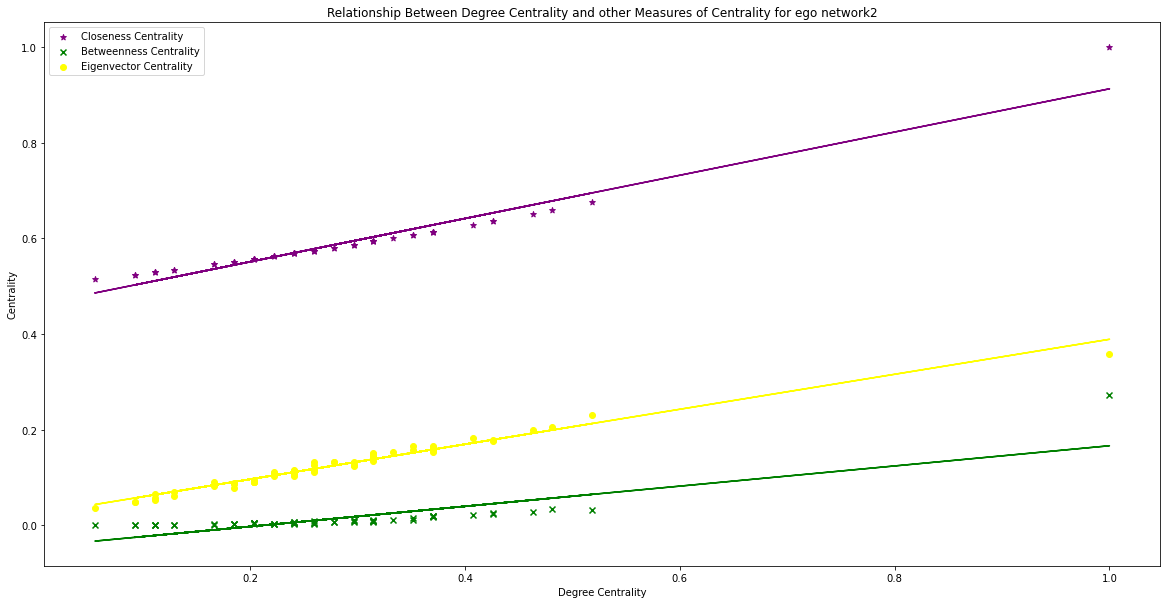

The correlation coefficient between the Degree Centrality and the Closeness Centrality is 0.9677105373692595
The correlation coefficient between the Degree Centrality and the Betweenness Centrality is 0.8273935355394901
The correlation coefficient between the Degree Centrality and the Eigenvector Centrality is 0.9875146084682601


In [70]:
#create lists for colours, markers and labels
colours = ['purple', 'green', 'yellow']
markers = ['*', 'x', 'o']
labels = ['Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality']

#I would like to see the relationship between the degree centrality 
#and the other measures of centrality for ego network2
scatter_line(s_deg_ego2, colours, markers, labels, 'Degree Centrality', 'Centrality', 
             'Relationship Between Degree Centrality and other Measures of Centrality for ego network2',
             s_close_ego2, s_betw_ego2, s_eig_ego2)

Similar to network2, the ego network's centralities are strongly influenced by its degree centrality. The degree centrality has a particularly strong influence on the eigenvector centrality with a correlation coefficient of 0.9875

# Task 4

## a)

In [71]:
#save network1 in GEXF XML format
nx.write_gexf(graph1, "network1.gexf", prettyprint=True)

In [72]:
#save network2 in GEXF XML format
nx.write_gexf(graph2, "network2.gexf", prettyprint=True)

Both graphs produced with Gephi were produced in a way such that the colour of the nodes were partitioned based on their modularity class and ranked according to their degree. Both graphs were constructed using the force atlas layout and the label sizes were proportional to the size of the node to which they belonged